In [18]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

### データセットの用意

In [9]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
# 正規分布に従う乱数を生成
X_xor = np.random.randn(200,2)
X_xor

array([[ 1.62434536e+00, -6.11756414e-01],
       [-5.28171752e-01, -1.07296862e+00],
       [ 8.65407629e-01, -2.30153870e+00],
       [ 1.74481176e+00, -7.61206901e-01],
       [ 3.19039096e-01, -2.49370375e-01],
       [ 1.46210794e+00, -2.06014071e+00],
       [-3.22417204e-01, -3.84054355e-01],
       [ 1.13376944e+00, -1.09989127e+00],
       [-1.72428208e-01, -8.77858418e-01],
       [ 4.22137467e-02,  5.82815214e-01],
       [-1.10061918e+00,  1.14472371e+00],
       [ 9.01590721e-01,  5.02494339e-01],
       [ 9.00855949e-01, -6.83727859e-01],
       [-1.22890226e-01, -9.35769434e-01],
       [-2.67888080e-01,  5.30355467e-01],
       [-6.91660752e-01, -3.96753527e-01],
       [-6.87172700e-01, -8.45205641e-01],
       [-6.71246131e-01, -1.26645989e-02],
       [-1.11731035e+00,  2.34415698e-01],
       [ 1.65980218e+00,  7.42044161e-01],
       [-1.91835552e-01, -8.87628964e-01],
       [-7.47158294e-01,  1.69245460e+00],
       [ 5.08077548e-02, -6.36995647e-01],
       [ 1.

In [10]:
# 排他的論理和を実行(片方が1、片方が0ならTrue)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor

array([ True, False,  True,  True,  True,  True, False,  True, False,
       False,  True, False,  True, False,  True, False, False, False,
        True, False, False,  True,  True, False, False,  True, False,
        True, False, False,  True,  True,  True, False,  True, False,
       False,  True,  True, False, False, False, False,  True, False,
       False, False, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False, False, False, False,  True,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True, False, False,  True, False,
       False,  True,  True, False, False,  True, False,  True,  True,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False,  True,  True,  True, False,
        True,  True,

In [11]:
y_xor = np.where(y_xor, 1, -1)

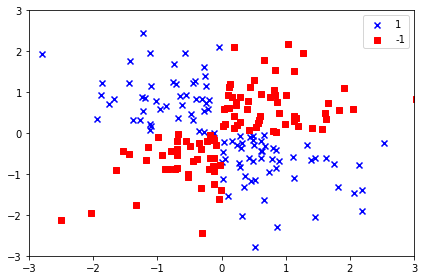

In [12]:
# このままだと線形分離できないよー

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('images/03_12.png', dpi=300)
plt.show()

### カーネルを用いて線形分離できないデータを高次元空間に射影して分類に挑戦

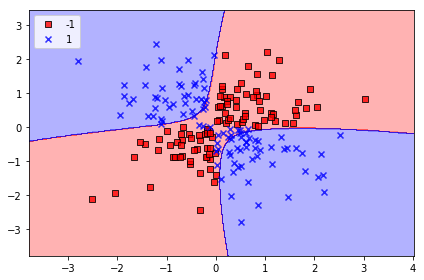

In [19]:
from sklearn.svm import SVC

# rbf：動径基底関数カーネル(RadialBasisFunction)
# γ：ハイパーパラメーター
svm = SVC(kernel='rbf' , random_state=1 , gamma=0.10 , C=10.0) 
svm.fit(X_xor , y_xor)
plot_decision_regions(X_xor , y_xor , classifier=svm)
plt.legend(loc='upper left') # 凡例
plt.tight_layout()
plt.show()

### Irisのデータセットを用意

In [20]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
iris = load_iris()

iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_label = pd.Series(data=iris.target)

# petal length & petal width
X = iris_data.iloc[:, [2,3]].values 
y = iris_label

# 訓練用データセットとテスト用データセットに分割
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

# 標準化(Sklearnのパッケージを利用する)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

### γパラメータの変更による決定境界の違いを検証

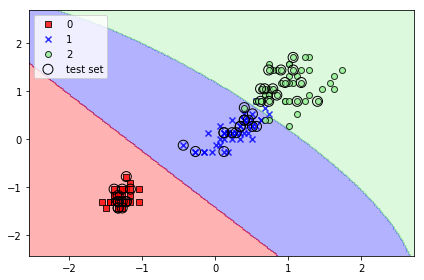

In [21]:
from sklearn.svm import SVC

# rbf：動径基底関数カーネル(RadialBasisFunction)
# γ：ハイパーパラメーター
svm = SVC(kernel='rbf' , random_state=1 , gamma=0.10 , C=10.0) 
svm.fit(X_train_std , y_train)
plot_decision_regions(X_combined_std , y_combined , classifier=svm , test_idx=range(105,150))
plt.legend(loc='upper left') # 凡例
plt.tight_layout()
plt.show()

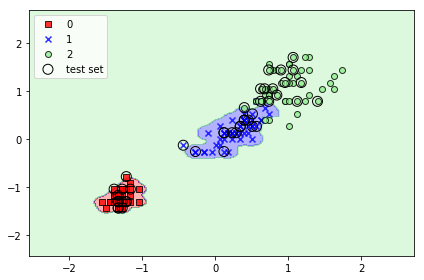

In [22]:
from sklearn.svm import SVC

# rbf：動径基底関数カーネル(RadialBasisFunction)
# γ：ハイパーパラメーター
svm = SVC(kernel='rbf' , random_state=1 , gamma=100 , C=10.0) 
svm.fit(X_train_std , y_train)
plot_decision_regions(X_combined_std , y_combined , classifier=svm , test_idx=range(105,150))
plt.legend(loc='upper left') # 凡例
plt.tight_layout()
plt.show()

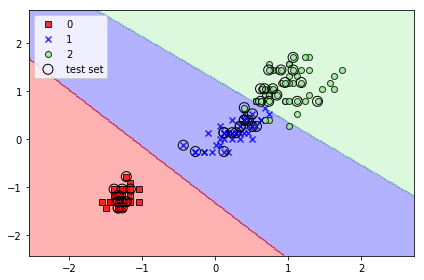

In [29]:
from sklearn.svm import SVC

# rbf：動径基底関数カーネル(RadialBasisFunction)
# γ：ハイパーパラメーター
svm = SVC(kernel='rbf' , random_state=1 , gamma=0.01 , C=10.0) 
svm.fit(X_train_std , y_train)
plot_decision_regions(X_combined_std , y_combined , classifier=svm , test_idx=range(105,150))
plt.legend(loc='upper left') # 凡例
plt.tight_layout()
plt.show()